# PRiAD 6 - test zaliczający

Test obejmuje materiał z ćwiczenia PRiAD6, wymaga także znajmości zagadnień z wcześniejszych ćwiczeń (w szczególności z uczenia nienadzorowanego). **Uwaga** - za każde zadanie można otrzymać 3 pkt, w sumie 9 pkt. Test jest zaliczony jeśli liczba punktów jest większa niż 4 ! Punkty z nadwyżki powyżej 5 zostaną doliczone jako bonusowe do punktacji przedmiotu (czyli za 6 pkt z tego testu +1 pkt; za 7 pkt z testu -> + 2 itd) !

---
**Imię, nazwisko i numer indeksu:** Maciej Czarkowski 292810

In [178]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as pat
import cv2
import skimage as si
import skimage.filters as sif
import skimage.segmentation as sis
import skimage.measure as sime
import skimage.morphology as simo
import skimage.color as sic
import PIL.Image

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

# zmiana sposobu wyświetlania danych typu float
pd.options.display.float_format = "{:.2f}".format 

In [179]:
#FUNKCJE POMOCNICZE

# funkcja wyswietlająca obraz kolorowy lub w skali szarości
def pokaz(obraz,tytul=""):
    if obraz.ndim == 2:
        plt.imshow(obraz,cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(obraz,cv2.COLOR_BGR2RGB))
    plt.title(tytul)


# funkcja wyświetlająca dwa obrazy z odpowiednią kolejnością składowych
def pokaz2(obr1,obr2):
    plt.figure(figsize=(10,5), dpi = 80)
    plt.subplot(1,2,1)   
    pokaz(obr1)
    plt.subplot(1,2,2)
    pokaz(obr2)
    
# funkcja wyświetlająca trzy obrazy z odpowiednią kolejnością składowych
def pokaz3(obr1,obr2,obr3):
    plt.figure(figsize=(15,5), dpi = 80)
    plt.subplot(1,3,1)   
    pokaz(obr1)
    plt.subplot(1,3,2)
    pokaz(obr2)
    plt.subplot(1,3,3)
    pokaz(obr3)

# funkcja wyświetlająca cztery obrazy z odpowiednią kolejnością składowych
def pokaz4(obr1,obr2,obr3,obr4):
    plt.figure(figsize=(10,10), dpi = 80)
    plt.subplot(2,2,1)   
    pokaz(obr1)
    plt.subplot(2,2,2)
    pokaz(obr2)
    plt.subplot(2,2,3)   
    pokaz(obr3)
    plt.subplot(2,2,4)
    pokaz(obr4)

# funkcja wyświetlająca obraz wraz z jego histogramem
def pokazhist(obraz):
    plt.figure(figsize=(10,5), dpi= 80)
    plt.subplot(1,2,1)
    pokaz(obraz)
    plt.subplot(1,2,2)
    if obraz.ndim == 3:
        color = ('b','g','r')
        for i,col in enumerate(color):
            histr = cv2.calcHist([obraz],[i],None,[256],[0,256])
            plt.plot(histr,color = col)
            plt.xlim([0,256])
        plt.show()
    else:
        histr = cv2.calcHist([obraz],[0],None,[256],[0,256])
        plt.plot(histr)
        plt.xlim([0,256])
        plt.show()
           
# wyswielanie obrazu oraz wyniku zastosowania LUT
def pokazlut(obr,lut):
    obrwyj = cv2.LUT(obr,lut)
    plt.figure(figsize=(15,5), dpi= 80)
    plt.subplot(1,3,1)
    pokaz(obr)
    plt.subplot(1,3,2)
    plt.plot(lut[0,:], color = 'b' )
    plt.xlim([0,256])
    plt.ylim([0,256])
    plt.subplot(1,3,3)
    pokaz(obrwyj)
    return obrwyj

---

> **Zadanie 1** Wczytaj obraz `PRiAD6.tif`. Obraz zawiera owalne obiekty trzech rodzajów - małe oraz większe o dwóch orientacjach. Dokonaj jego binaryzacji (poprzedzonej lub porzedzającej jeśli to konieczne) filtrację tak by otrzymać obraz zawierający jedynie białe owalne obiekty trzech rodzajów na jednolitym czarnym tle (3 pkt). 

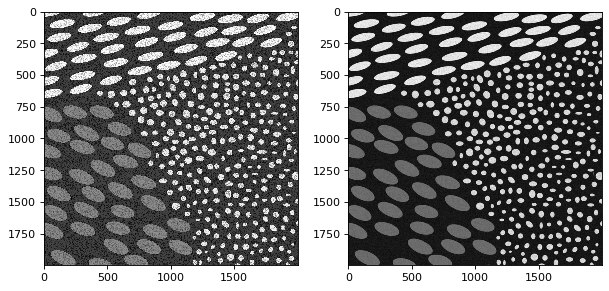

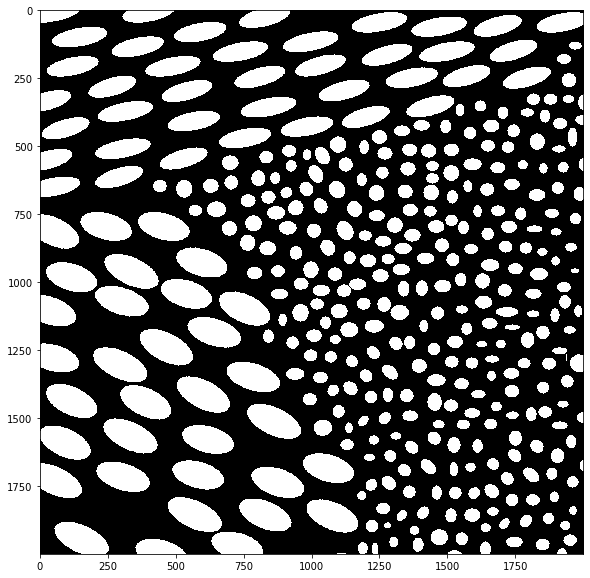

In [180]:
og = cv2.imread('PRIAD6.tif', 0)
#ret, otsu = cv2.threshold(o,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU) -- ret okazało się nieefektywne
sasiedztwo = 2
rozmiar_maski = sasiedztwo*2 + 1
o = cv2.blur(og,(rozmiar_maski, rozmiar_maski))
dol, gora = 68, 255
prg = np.zeros((2000,2000), np.uint8)
ret, prg[:,:] = cv2.threshold(o,dol,gora,cv2.THRESH_BINARY)
o2 = prg[:,:];
plt.figure(figsize=(9,6), dpi= 80)
plt.subplot(1,2,1)
pokaz(og);
plt.subplot(1,2,2)
pokaz(o);
plt.figure(figsize=(10,10))
pokaz(o2);

> **Zadanie 2** Wykonaj etykietowanie obiektów, w efekcie którego każdy obiekt otrzyma swoją unikalną etykietę. Wyświetl w dowolny sposób obraz zawierający etykiety. Dobierz cechy umożliwiające rozróżnienie trzech rodzajów obiektów (3 pkt) 

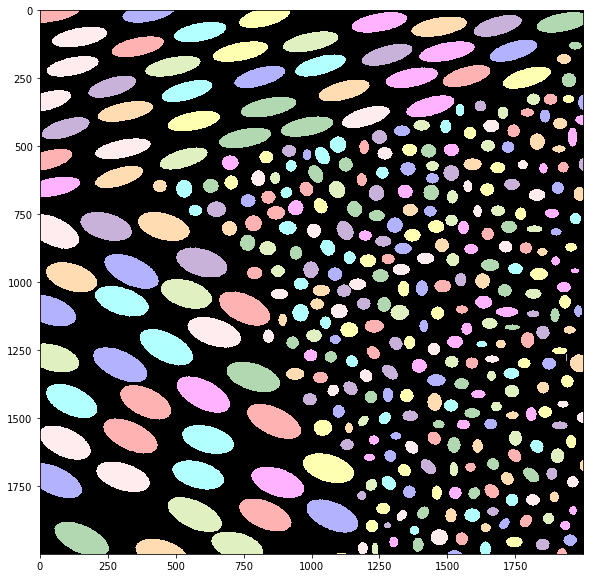

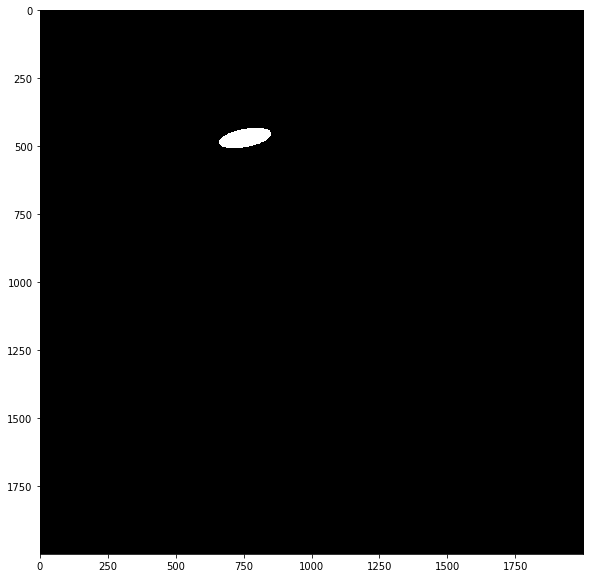

In [184]:
obraz = o2;
elstr = np.ones((5,5),np.uint8)
otwarcie = cv2.morphologyEx(obraz,cv2.MORPH_OPEN,elstr)
#etykietowanie
etykiety = sime.label(otwarcie)
# wyswietlanie
kolorowy = sic.label2rgb(etykiety, image=obraz, bg_label=0)
plt.figure(figsize = (10,10))
plt.imshow(kolorowy)
plt.figure(figsize = (10,10))
pokaz(etykiety == 55)

Wybrane cechy (prosze wpisać, liczba punktów poniżej nie jest sugestią, cech powinno byc tyle ile potrzeba):
1. Rozmiar
2. Orientacja
3. Eccentricity -- okrągłość

> **Zadanie 3** Wykonaj grupowanie danych wykorzystując wybrane przed chwilą cechy, tak by w jego wyniku uzyskać podział zbioru obiektów na grupy zgodny ze stanem faktycznym tj. z trzema grupami: obiektami małymi i większymi o obu orientacjach. Na podstawie wyniku grupowania wygeneruj obraz, w którym obiekty należące do każdej grupy będą oznaczone inną szrością lub kolorem (3 pkt).

C:\anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in less
  if sys.path[0] == '':
C:\anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in greater
  if sys.path[0] == '':
C:\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in greater
  del sys.path[0]
C:\anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in less
  


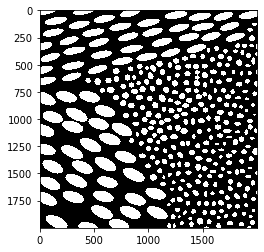

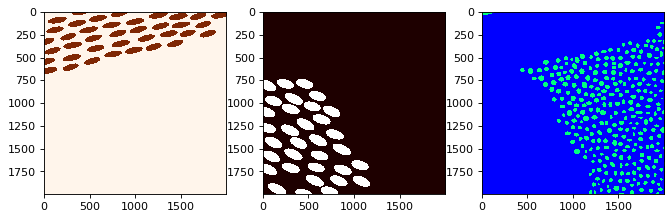

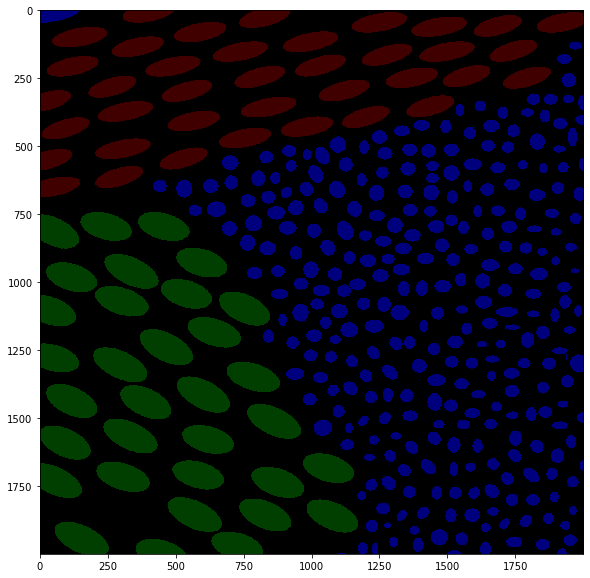

In [185]:
pokaz(o2);
cechy = sime.regionprops(etykiety)
ile_obiektow = len(cechy)
lista_cech = ['Area','Orientation','Eccentricity']
ile_cech = len(lista_cech)
tabela_cech = np.zeros((ile_obiektow+1,ile_cech+1))
tabela_cech[0,:] = np.nan #np.ones((1,ile_cech +1))*-99 # cechy nieistniejącego obiektu o etykiecie "0"
for i in range(0,ile_obiektow):
    for j in range(0,ile_cech):
        tabela_cech[i+1,j] = cechy[i][lista_cech[j]]
plt.figure(figsize=(10,10), dpi = 80)
condition_1 = (tabela_cech[:,0] < 12000) & (tabela_cech[:,0] > 5000) & (tabela_cech[:,2] > 0.2) & (tabela_cech[:,1] < 0)
condition_2 = (tabela_cech[:,0] > 5000) & (tabela_cech[:,2] > 0.1) & (tabela_cech[:,1] > 0)
condition_3 = (tabela_cech[:,0] < 5000)
plt.subplot(1,3,1)
plt.imshow(np.where(np.isin(etykiety,np.where(condition_1)),255,0),'Oranges')
plt.subplot(1,3,2)
plt.imshow(np.where(np.isin(etykiety,np.where(condition_2)),255,0),'pink')
plt.subplot(1,3,3)
plt.imshow(np.where(np.isin(etykiety,np.where(condition_3)),255,0),'winter')

one = PIL.Image.fromarray(np.where(np.isin(etykiety,np.where(condition_1)),255,0))
two = PIL.Image.fromarray(np.where(np.isin(etykiety,np.where(condition_2)),255,0))
three = PIL.Image.fromarray(np.where(np.isin(etykiety,np.where(condition_3)),255,0))

one = one.convert('RGBA')
data = np.array(one)
red, green, blue, alpha = data.T
white_areas = (red == 255) & (blue == 255) & (green == 255)
data[..., :-1][white_areas.T] = (255, 0, 0)
one = PIL.Image.fromarray(data)

two = two.convert('RGBA')
data = np.array(two)
red, green, blue, alpha = data.T
white_areas = (red == 255) & (blue == 255) & (green == 255)
data[..., :-1][white_areas.T] = (0, 255, 0)
two = PIL.Image.fromarray(data)

three = three.convert('RGBA')
data = np.array(three)
red, green, blue, alpha = data.T
white_areas = (red == 255) & (blue == 255) & (green == 255)
data[..., :-1][white_areas.T] = (0, 0, 255)
three = PIL.Image.fromarray(data)
plt.figure(figsize=(10,10))
im1 = plt.imshow(one, alpha=1)
im2 = plt.imshow(two,  alpha=0.5)
im3 = plt.imshow(three, alpha=0.5)
plt.show()

(Różne kolorki na różne sposoby)

> **Zadanie 4** (niepunktowane) Zmień nazwę tego skryptu na następującą "PRiAD6_Imię_Nazwisko.ipynb" i wgraj wgraj go do ISOD-a we wskazane miejsce, nie przekraczając wyznaczonego terminu.